## Tutorial on how to use the CLMS Data Store powered by xcube

In [1]:
from xcube.core.store import new_data_store

To get the credentials.json, please follow the steps outlined here. https://eea.github.io/clms-api-docs/authentication.html

In [2]:
import json
json_file_path = "credentials.json"
with open(json_file_path, 'r') as j:
     credentials = json.loads(j.read())

When the user creates a new CLMS data store, it already sends requests to the CLMS API to get the catalog information. If no path is provided for the cache location, it will create a `preload_cache/` in the current directory to store all the downloaded data and initialize a local file store

In [4]:
url = "https://land.copernicus.eu/api"
cds = new_data_store("clms", url=url, credentials=credentials)

xcube.clms - 2024-12-06 21:51:32,982 -  INFO - Making a request to https://land.copernicus.eu/@@oauth2-token


Task: Waiting for response for server for the request: https://land.copernicus.eu/@@oauth2-token: ◐ Elapsed time: 0s

xcube.clms - 2024-12-06 21:51:33,284 -  INFO - Token refreshed successfully.
xcube.clms - 2024-12-06 21:51:33,285 -  INFO - Local Filestore for preload cache created at /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/
xcube.clms - 2024-12-06 21:51:33,288 -  INFO - Fetching datasets metadata from https://land.copernicus.eu/api
xcube.clms - 2024-12-06 21:51:33,289 -  INFO - Making a request to https://land.copernicus.eu/api/@search/?portal_type=DataSet&fullobjects=1


Task: Waiting for response for server for the request: https://land.copernicus.eu/@@oauth2-token: Done!                                                  
Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?portal_type=DataSet&fullobjects=1: ◒ Elapsed time: 2s

xcube.clms - 2024-12-06 21:51:35,701 -  INFO - Making a request to https://land.copernicus.eu/api/@search/?b_start=25&portal_type=DataSet&fullobjects=1


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?portal_type=DataSet&fullobjects=1: Done!                                                  
Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?b_start=25&portal_type=DataSet&fullobjects=1: ◓ Elapsed time: 1s

xcube.clms - 2024-12-06 21:51:37,515 -  INFO - Making a request to https://land.copernicus.eu/api/@search/?b_start=50&portal_type=DataSet&fullobjects=1


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?b_start=25&portal_type=DataSet&fullobjects=1: Done!                                                  
Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?b_start=50&portal_type=DataSet&fullobjects=1: ◓ Elapsed time: 1s

xcube.clms - 2024-12-06 21:51:39,327 -  INFO - Making a request to https://land.copernicus.eu/api/@search/?b_start=75&portal_type=DataSet&fullobjects=1


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?b_start=50&portal_type=DataSet&fullobjects=1: Done!                                                  
Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?b_start=75&portal_type=DataSet&fullobjects=1: ◒ Elapsed time: 2s

xcube.clms - 2024-12-06 21:51:41,759 -  INFO - Making a request to https://land.copernicus.eu/api/@search/?b_start=100&portal_type=DataSet&fullobjects=1


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?b_start=75&portal_type=DataSet&fullobjects=1: Done!                                                  
Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?b_start=100&portal_type=DataSet&fullobjects=1: ◓ Elapsed time: 1s

xcube.clms - 2024-12-06 21:51:43,571 -  INFO - Making a request to https://land.copernicus.eu/api/@search/?b_start=125&portal_type=DataSet&fullobjects=1


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?b_start=100&portal_type=DataSet&fullobjects=1: Done!                                                  
Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?b_start=125&portal_type=DataSet&fullobjects=1: ◐ Elapsed time: 1s

xcube.clms - 2024-12-06 21:51:45,082 -  INFO - Making a request to https://land.copernicus.eu/api/@search/?b_start=150&portal_type=DataSet&fullobjects=1


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?b_start=125&portal_type=DataSet&fullobjects=1: Done!                                                  
Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?b_start=150&portal_type=DataSet&fullobjects=1: ◑ Elapsed time: 1s

xcube.clms - 2024-12-06 21:51:47,193 -  INFO - Making a request to https://land.copernicus.eu/api/@search/?b_start=175&portal_type=DataSet&fullobjects=1


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?b_start=150&portal_type=DataSet&fullobjects=1: Done!                                                  
Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@search/?b_start=175&portal_type=DataSet&fullobjects=1: Done!                                                  


In [5]:
cds.get_data_store_params_schema()

With the following commands, the users can see how the data_ids look like for the CLMS store. Due to the nature of the API, we came up with the computed data_id that combines the product_id and item_id along with the `|` separator. But as a user, you dont have to worry about how it is created, but just that you need to use the complete data_id for interacting with any of the methods of this store

In [6]:
cds.list_data_ids()

['clc-backbone-2021|CLMS_CLCplus_RASTER_2021',
 'clc-backbone-2018|CLMS_CLCplus_RASTER_2018_010m_eu_03035_V1_1',
 'season-maximum-value-2023-raster-300m-global-yearly-version-1|(SEASON 1) c_gls_LSP300-MAXV-S1_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'season-maximum-value-2023-raster-300m-global-yearly-version-1|(SEASON 2) c_gls_LSP300-MAXV-S2_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'slope_of_green-up-period-2023-raster-300m-global-yearly-version-1|(SEASON 1) c_gls_LSP300-LSLOPE-S1_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'slope_of_green-up-period-2023-raster-300m-global-yearly-version-1|(SEASON 2) c_gls_LSP300-LSLOPE-S2_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'slope_of_green-down-period-2023-raster-300m-global-yearly-version-1|(SEASON 1) c_gls_LSP300-RSLOPE-S1_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'slope_of_green-down-period-2023-raster-300m-global-yearly-version-1|(SEASON 2) c_gls_LSP300-RSLOPE-S2_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'start-of-season-value-2023-raster-300m-global-yearly-

In [7]:
cds.get_data_opener_ids()

('dataset:netcdf:clms', 'dataset:geotiff:clms', 'dataset:zarr:clms')

In [8]:
cds.get_data_types()

('dataset',)

In [9]:
cds.get_preload_params_schema()

In [10]:
cds.has_data('forest-type-2018|FTY_2018_100m_eu_03035_v010')

True

In [11]:
dataset_to_preload = ('forest-type-2018|FTY_2018_010m_lv_03035_v010', 'dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010')

When the user runs the preload_data method, the user can view its status using the LOG messages, which indicate the status of the download request followed by any progress bars that involve downloading the dataset, extracting and postprocessing it. This cell is non-blocking, so the user can proceed to continue working on other cells. 

NOTE: Currently, we run the preload tasks for each of the data_id in a separate thread which could have certain issues with displaying the progress bars. For e.g. if you run another cell, after the preload_data method, the progress bars might be displayed on that new cell instead. This could be improved in the later versions.

Please scroll through the logs below to view what's happening during the preload.

In [13]:
cds.preload_data(*dataset_to_preload)

xcube.clms - 2024-12-06 21:53:42,484 -  INFO - Current token valid. Reusing it.
xcube.clms - 2024-12-06 21:53:42,485 -  INFO - Current token valid. Reusing it.
xcube.clms - 2024-12-06 21:53:42,485 -  INFO - Current token valid. Reusing it.
xcube.clms - 2024-12-06 21:53:42,485 -  INFO - Making a request to https://land.copernicus.eu/api/@datarequest_search


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_search: ◐ Elapsed time: 0s

xcube.clms - 2024-12-06 21:53:42,486 -  INFO - Current token valid. Reusing it.
xcube.clms - 2024-12-06 21:53:42,488 -  INFO - Making a request to https://land.copernicus.eu/api/@datarequest_search


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_search: ◑ Elapsed time: 0s

xcube.clms - 2024-12-06 21:53:43,391 -  INFO - Download request does not exists or has expired for data id: forest-type-2018|FTY_2018_010m_lv_03035_v010
xcube.clms - 2024-12-06 21:53:43,392 -  INFO - Download request does not exists or has expired for data id: dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010
xcube.clms - 2024-12-06 21:53:43,392 -  INFO - Preparing download request for forest-type-2018|FTY_2018_010m_lv_03035_v010
xcube.clms - 2024-12-06 21:53:43,392 -  INFO - Preparing download request for dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010
xcube.clms - 2024-12-06 21:53:43,393 -  INFO - Making a request to https://land.copernicus.eu/api/@datarequest_post


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_search: Done!                                                  
Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_search: Done!                                                  
Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_post: ◐ Elapsed time: 0s

xcube.clms - 2024-12-06 21:53:43,393 -  INFO - Making a request to https://land.copernicus.eu/api/@datarequest_post


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_post: ◒ Elapsed time: 3s

xcube.clms - 2024-12-06 21:53:47,006 -  INFO - Download Requested with Task ID : 25447855253


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_post: Done!                                                  
Task: 25447855253: ◐ Elapsed time: 0s for the request: https://land.copernicus.eu/api/@datarequest_post: ◐ Elapsed time: 3s

xcube.clms - 2024-12-06 21:53:47,007 -  INFO - Current token valid. Reusing it.
xcube.clms - 2024-12-06 21:53:47,008 -  INFO - Making a request to https://land.copernicus.eu/api/@datarequest_search


Task: 25447855253: ◑ Elapsed time: 0s for the request: https://land.copernicus.eu/api/@datarequest_post: ◑ Elapsed time: 4s0s

xcube.clms - 2024-12-06 21:53:47,610 -  INFO - Status: PENDING for dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010 with task ID 25447855253. Will recheck status in 60 seconds


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_search: Done!                                                  


xcube.clms - 2024-12-06 21:53:47,909 -  INFO - Download Requested with Task ID : 88919563411


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_post: Done!                                                  
Task: 25447855253: ◒ Elapsed time: 0s

xcube.clms - 2024-12-06 21:53:47,911 -  INFO - Current token valid. Reusing it.


Task: 88919563411: ◐ Elapsed time: 0s

xcube.clms - 2024-12-06 21:53:47,911 -  INFO - Making a request to https://land.copernicus.eu/api/@datarequest_search


Task: 88919563411: ◑ Elapsed time: 0s for the request: https://land.copernicus.eu/api/@datarequest_search: ◓ Elapsed time: 0s

xcube.clms - 2024-12-06 21:53:48,513 -  INFO - Status: PENDING for forest-type-2018|FTY_2018_010m_lv_03035_v010 with task ID 88919563411. Will recheck status in 60 seconds


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_search: Done!                                                  
Task: 25447855253: ◓ Elapsed time: 60s

xcube.clms - 2024-12-06 21:54:47,611 -  INFO - Current token valid. Reusing it.
xcube.clms - 2024-12-06 21:54:47,612 -  INFO - Making a request to https://land.copernicus.eu/api/@datarequest_search


Task: 88919563411: ◐ Elapsed time: 60sfor the request: https://land.copernicus.eu/api/@datarequest_search: ◓ Elapsed time: 0s

xcube.clms - 2024-12-06 21:54:48,216 -  INFO - Status: COMPLETE for dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010 with task ID 25447855253.


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_search: Done!                                                  
Task: 88919563411: ◓ Elapsed time: 60s

xcube.clms - 2024-12-06 21:54:48,443 -  INFO - Current token valid. Reusing it.
xcube.clms - 2024-12-06 21:54:48,443 -  INFO - Making a request to https://land.copernicus.eu/api/@datarequest_search


Task: 25447855253: Done!                                                  
Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_search: ◐ Elapsed time: 0s

xcube.clms - 2024-12-06 21:54:48,514 -  INFO - Current token valid. Reusing it.
xcube.clms - 2024-12-06 21:54:48,515 -  INFO - Making a request to https://land.copernicus.eu/api/@datarequest_search


Task: 88919563411: ◒ Elapsed time: 61sfor the request: https://land.copernicus.eu/api/@datarequest_search: ◓ Elapsed time: 0s

xcube.clms - 2024-12-06 21:54:49,046 -  INFO - Downloading zip file from https://copernicus-fme.eea.europa.eu/clmsdatadownload/results/131997.zip
xcube.clms - 2024-12-06 21:54:49,047 -  INFO - Making a request to https://copernicus-fme.eea.europa.eu/clmsdatadownload/results/131997.zip


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_search: Done!                                                  
Task: Waiting for response for server for the request: https://copernicus-fme.eea.europa.eu/clmsdatadownload/results/131997.zip: ◐ Elapsed time: 0s

xcube.clms - 2024-12-06 21:54:49,118 -  INFO - Status: COMPLETE for forest-type-2018|FTY_2018_010m_lv_03035_v010 with task ID 88919563411.


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_search: Done!                                                  


xcube.clms - 2024-12-06 21:54:49,345 -  INFO - Current token valid. Reusing it.
xcube.clms - 2024-12-06 21:54:49,346 -  INFO - Making a request to https://land.copernicus.eu/api/@datarequest_search


Task: 88919563411: Done!                                                  
Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_search: ◐ Elapsed time: 0s

xcube.clms - 2024-12-06 21:54:49,349 -  INFO - Temporary file created at /tmp/tmpqszcbhv1


Task: Waiting for response for server for the request: https://copernicus-fme.eea.europa.eu/clmsdatadownload/results/131997.zip: Done!                                                  


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_search: ◓ Elapsed time: 0s

xcube.clms - 2024-12-06 21:54:49,949 -  INFO - Downloading zip file from https://copernicus-fme.eea.europa.eu/clmsdatadownload/results/131999.zip
xcube.clms - 2024-12-06 21:54:49,950 -  INFO - Making a request to https://copernicus-fme.eea.europa.eu/clmsdatadownload/results/131999.zip


Task: Waiting for response for server for the request: https://land.copernicus.eu/api/@datarequest_search: Done!                                                  
Task: Waiting for response for server for the request: https://copernicus-fme.eea.europa.eu/clmsdatadownload/results/131999.zip: ◐ Elapsed time: 0s

xcube.clms - 2024-12-06 21:54:50,252 -  INFO - Temporary file created at /tmp/tmp0h_78tx2


Task: Waiting for response for server for the request: https://copernicus-fme.eea.europa.eu/clmsdatadownload/results/131999.zip: Done!                                                  


xcube.clms - 2024-12-06 21:54:54,008 -  INFO - Found one zip file Results/DLTC_1518_020m_tr_03035_v010.zip.
xcube.clms - 2024-12-06 21:54:54,593 -  INFO - Found geo file: DLTC_1518_020m_tr_03035_v010/DATA/DLTC_1518_020m_E56N19_03035_v010.tif
xcube.clms - 2024-12-06 21:54:54,595 -  INFO - Found geo file: DLTC_1518_020m_tr_03035_v010/DATA/DLTC_1518_020m_E56N20_03035_v010.tif
xcube.clms - 2024-12-06 21:54:54,595 -  INFO - Found geo file: DLTC_1518_020m_tr_03035_v010/DATA/DLTC_1518_020m_E56N21_03035_v010.tif
xcube.clms - 2024-12-06 21:54:54,596 -  INFO - Found geo file: DLTC_1518_020m_tr_03035_v010/DATA/DLTC_1518_020m_E56N22_03035_v010.tif
xcube.clms - 2024-12-06 21:54:54,596 -  INFO - Found geo file: DLTC_1518_020m_tr_03035_v010/DATA/DLTC_1518_020m_E57N18_03035_v010.tif
xcube.clms - 2024-12-06 21:54:54,597 -  INFO - Found geo file: DLTC_1518_020m_tr_03035_v010/DATA/DLTC_1518_020m_E57N19_03035_v010.tif
xcube.clms - 2024-12-06 21:54:54,597 -  INFO - Found geo file: DLTC_1518_020m_tr_03035_v

Extracting geo files for task_id {task_id}:   0%|          | 0/112 [00:00<?, ?it/s]

Extracting geo file DLTC_1518_020m_E56N19_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:54,710 -  INFO - The file DLTC_1518_020m_E56N19_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E56N19_03035_v010.tif


Extracting geo file DLTC_1518_020m_E56N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:54,735 -  INFO - The file DLTC_1518_020m_E56N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E56N20_03035_v010.tif


Extracting geo file DLTC_1518_020m_E56N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:54,764 -  INFO - The file DLTC_1518_020m_E56N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E56N21_03035_v010.tif


Extracting geo file DLTC_1518_020m_E56N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:54,795 -  INFO - The file DLTC_1518_020m_E56N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E56N22_03035_v010.tif


Extracting geo file DLTC_1518_020m_E57N18_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:54,825 -  INFO - The file DLTC_1518_020m_E57N18_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E57N18_03035_v010.tif


Extracting geo file DLTC_1518_020m_E57N19_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:54,857 -  INFO - The file DLTC_1518_020m_E57N19_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E57N19_03035_v010.tif


Extracting geo file DLTC_1518_020m_E57N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:54,885 -  INFO - The file DLTC_1518_020m_E57N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E57N20_03035_v010.tif


Extracting geo file DLTC_1518_020m_E57N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:54,931 -  INFO - The file DLTC_1518_020m_E57N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E57N21_03035_v010.tif


Extracting geo file DLTC_1518_020m_E57N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:54,979 -  INFO - The file DLTC_1518_020m_E57N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E57N22_03035_v010.tif


Extracting geo file DLTC_1518_020m_E58N16_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:54,987 -  INFO - The file DLTC_1518_020m_E58N16_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E58N16_03035_v010.tif


Extracting geo file DLTC_1518_020m_E58N17_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:54,997 -  INFO - The file DLTC_1518_020m_E58N17_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E58N17_03035_v010.tif


Extracting geo file DLTC_1518_020m_E58N18_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,023 -  INFO - The file DLTC_1518_020m_E58N18_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E58N18_03035_v010.tif


Extracting geo file DLTC_1518_020m_E58N19_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,055 -  INFO - The file DLTC_1518_020m_E58N19_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E58N19_03035_v010.tif


Extracting geo file DLTC_1518_020m_E58N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,078 -  INFO - The file DLTC_1518_020m_E58N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E58N20_03035_v010.tif


Extracting geo file DLTC_1518_020m_E58N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,116 -  INFO - The file DLTC_1518_020m_E58N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E58N21_03035_v010.tif


Extracting geo file DLTC_1518_020m_E58N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,157 -  INFO - The file DLTC_1518_020m_E58N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E58N22_03035_v010.tif


Extracting geo file DLTC_1518_020m_E59N16_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,166 -  INFO - The file DLTC_1518_020m_E59N16_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E59N16_03035_v010.tif


Extracting geo file DLTC_1518_020m_E59N17_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,179 -  INFO - The file DLTC_1518_020m_E59N17_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E59N17_03035_v010.tif


Extracting geo file DLTC_1518_020m_E59N18_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,201 -  INFO - The file DLTC_1518_020m_E59N18_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E59N18_03035_v010.tif


Extracting geo file DLTC_1518_020m_E59N19_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,230 -  INFO - The file DLTC_1518_020m_E59N19_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E59N19_03035_v010.tif


Extracting geo file DLTC_1518_020m_E59N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,255 -  INFO - The file DLTC_1518_020m_E59N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E59N20_03035_v010.tif


Extracting geo file DLTC_1518_020m_E59N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,296 -  INFO - The file DLTC_1518_020m_E59N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E59N21_03035_v010.tif


Extracting geo file DLTC_1518_020m_E59N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,328 -  INFO - The file DLTC_1518_020m_E59N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E59N22_03035_v010.tif


Extracting geo file DLTC_1518_020m_E60N16_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,337 -  INFO - The file DLTC_1518_020m_E60N16_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E60N16_03035_v010.tif


Extracting geo file DLTC_1518_020m_E60N17_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,355 -  INFO - The file DLTC_1518_020m_E60N17_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E60N17_03035_v010.tif


Extracting geo file DLTC_1518_020m_E60N18_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,381 -  INFO - The file DLTC_1518_020m_E60N18_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E60N18_03035_v010.tif
xcube.clms - 2024-12-06 21:54:55,396 -  INFO - Found one zip file Results/FTY_2018_010m_lv_03035_v010.zip.


Extracting geo file DLTC_1518_020m_E60N19_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,413 -  INFO - The file DLTC_1518_020m_E60N19_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E60N19_03035_v010.tif


Extracting geo file DLTC_1518_020m_E60N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,456 -  INFO - The file DLTC_1518_020m_E60N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E60N20_03035_v010.tif


Extracting geo file DLTC_1518_020m_E60N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,504 -  INFO - The file DLTC_1518_020m_E60N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E60N21_03035_v010.tif


Extracting geo file DLTC_1518_020m_E60N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,539 -  INFO - The file DLTC_1518_020m_E60N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E60N22_03035_v010.tif


Extracting geo file DLTC_1518_020m_E61N16_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,553 -  INFO - The file DLTC_1518_020m_E61N16_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E61N16_03035_v010.tif


Extracting geo file DLTC_1518_020m_E61N17_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,579 -  INFO - The file DLTC_1518_020m_E61N17_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E61N17_03035_v010.tif


Extracting geo file DLTC_1518_020m_E61N18_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,607 -  INFO - The file DLTC_1518_020m_E61N18_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E61N18_03035_v010.tif


Extracting geo file DLTC_1518_020m_E61N19_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,654 -  INFO - The file DLTC_1518_020m_E61N19_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E61N19_03035_v010.tif


Extracting geo file DLTC_1518_020m_E61N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,678 -  INFO - The file DLTC_1518_020m_E61N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E61N20_03035_v010.tif


Extracting geo file DLTC_1518_020m_E61N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,708 -  INFO - The file DLTC_1518_020m_E61N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E61N21_03035_v010.tif


Extracting geo file DLTC_1518_020m_E61N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,767 -  INFO - The file DLTC_1518_020m_E61N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E61N22_03035_v010.tif
xcube.clms - 2024-12-06 21:54:55,792 -  INFO - Found geo file: FTY_2018_010m_lv_03035_v010/DATA/FTY_2018_010m_E49N37_03035_v010.tif
xcube.clms - 2024-12-06 21:54:55,796 -  INFO - Found geo file: FTY_2018_010m_lv_03035_v010/DATA/FTY_2018_010m_E49N38_03035_v010.tif


Extracting geo file DLTC_1518_020m_E61N23_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,797 -  INFO - Found geo file: FTY_2018_010m_lv_03035_v010/DATA/FTY_2018_010m_E50N37_03035_v010.tif
xcube.clms - 2024-12-06 21:54:55,798 -  INFO - Found geo file: FTY_2018_010m_lv_03035_v010/DATA/FTY_2018_010m_E50N38_03035_v010.tif
xcube.clms - 2024-12-06 21:54:55,799 -  INFO - Found geo file: FTY_2018_010m_lv_03035_v010/DATA/FTY_2018_010m_E50N39_03035_v010.tif
xcube.clms - 2024-12-06 21:54:55,799 -  INFO - Found geo file: FTY_2018_010m_lv_03035_v010/DATA/FTY_2018_010m_E51N37_03035_v010.tif
xcube.clms - 2024-12-06 21:54:55,800 -  INFO - Found geo file: FTY_2018_010m_lv_03035_v010/DATA/FTY_2018_010m_E51N38_03035_v010.tif
xcube.clms - 2024-12-06 21:54:55,800 -  INFO - Found geo file: FTY_2018_010m_lv_03035_v010/DATA/FTY_2018_010m_E51N39_03035_v010.tif
xcube.clms - 2024-12-06 21:54:55,800 -  INFO - Found geo file: FTY_2018_010m_lv_03035_v010/DATA/FTY_2018_010m_E52N37_03035_v010.tif
xcube.clms - 2024-12-06 21:54:55,801 -  INFO - Found geo file: FTY_2018_010m

Extracting geo files for task_id {task_id}:   0%|          | 0/16 [00:00<?, ?it/s]

Extracting geo file FTY_2018_010m_E49N37_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file DLTC_1518_020m_E62N17_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,825 -  INFO - The file DLTC_1518_020m_E62N17_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E62N17_03035_v010.tif
xcube.clms - 2024-12-06 21:54:55,825 -  INFO - The file FTY_2018_010m_E49N37_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E49N37_03035_v010.tif


Extracting geo file DLTC_1518_020m_E62N18_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,879 -  INFO - The file DLTC_1518_020m_E62N18_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E62N18_03035_v010.tif


Extracting geo file FTY_2018_010m_E49N38_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,896 -  INFO - The file FTY_2018_010m_E49N38_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E49N38_03035_v010.tif


Extracting geo file DLTC_1518_020m_E62N19_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file FTY_2018_010m_E50N37_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,911 -  INFO - The file DLTC_1518_020m_E62N19_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E62N19_03035_v010.tif


Extracting geo file DLTC_1518_020m_E62N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,934 -  INFO - The file DLTC_1518_020m_E62N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E62N20_03035_v010.tif
xcube.clms - 2024-12-06 21:54:55,941 -  INFO - The file FTY_2018_010m_E50N37_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E50N37_03035_v010.tif


Extracting geo file DLTC_1518_020m_E62N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:55,990 -  INFO - The file DLTC_1518_020m_E62N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E62N21_03035_v010.tif


Extracting geo file FTY_2018_010m_E50N38_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file DLTC_1518_020m_E62N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,034 -  INFO - The file DLTC_1518_020m_E62N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E62N22_03035_v010.tif
xcube.clms - 2024-12-06 21:54:56,039 -  INFO - The file FTY_2018_010m_E50N38_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E50N38_03035_v010.tif


Extracting geo file DLTC_1518_020m_E62N23_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file FTY_2018_010m_E50N39_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,112 -  INFO - The file DLTC_1518_020m_E62N23_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E62N23_03035_v010.tif
xcube.clms - 2024-12-06 21:54:56,117 -  INFO - The file FTY_2018_010m_E50N39_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E50N39_03035_v010.tif


Extracting geo file DLTC_1518_020m_E62N24_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file FTY_2018_010m_E51N37_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,148 -  INFO - The file DLTC_1518_020m_E62N24_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E62N24_03035_v010.tif


Extracting geo file DLTC_1518_020m_E63N17_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,163 -  INFO - The file DLTC_1518_020m_E63N17_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E63N17_03035_v010.tif
xcube.clms - 2024-12-06 21:54:56,172 -  INFO - The file FTY_2018_010m_E51N37_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E51N37_03035_v010.tif


Extracting geo file DLTC_1518_020m_E63N18_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,203 -  INFO - The file DLTC_1518_020m_E63N18_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E63N18_03035_v010.tif


Extracting geo file FTY_2018_010m_E51N38_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file DLTC_1518_020m_E63N19_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,234 -  INFO - The file DLTC_1518_020m_E63N19_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E63N19_03035_v010.tif
xcube.clms - 2024-12-06 21:54:56,250 -  INFO - The file FTY_2018_010m_E51N38_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E51N38_03035_v010.tif


Extracting geo file DLTC_1518_020m_E63N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,259 -  INFO - The file DLTC_1518_020m_E63N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E63N20_03035_v010.tif


Extracting geo file DLTC_1518_020m_E63N21_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file FTY_2018_010m_E51N39_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,320 -  INFO - The file DLTC_1518_020m_E63N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E63N21_03035_v010.tif
xcube.clms - 2024-12-06 21:54:56,335 -  INFO - The file FTY_2018_010m_E51N39_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E51N39_03035_v010.tif


Extracting geo file DLTC_1518_020m_E63N22_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file FTY_2018_010m_E52N37_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,380 -  INFO - The file DLTC_1518_020m_E63N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E63N22_03035_v010.tif
xcube.clms - 2024-12-06 21:54:56,417 -  INFO - The file FTY_2018_010m_E52N37_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E52N37_03035_v010.tif


Extracting geo file DLTC_1518_020m_E63N23_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,439 -  INFO - The file DLTC_1518_020m_E63N23_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E63N23_03035_v010.tif


Extracting geo file FTY_2018_010m_E52N38_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file DLTC_1518_020m_E63N24_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,474 -  INFO - The file DLTC_1518_020m_E63N24_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E63N24_03035_v010.tif


Extracting geo file DLTC_1518_020m_E64N17_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,490 -  INFO - The file DLTC_1518_020m_E64N17_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E64N17_03035_v010.tif
xcube.clms - 2024-12-06 21:54:56,498 -  INFO - The file FTY_2018_010m_E52N38_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E52N38_03035_v010.tif


Extracting geo file DLTC_1518_020m_E64N18_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,529 -  INFO - The file DLTC_1518_020m_E64N18_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E64N18_03035_v010.tif


Extracting geo file FTY_2018_010m_E52N39_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file DLTC_1518_020m_E64N19_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,559 -  INFO - The file DLTC_1518_020m_E64N19_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E64N19_03035_v010.tif


Extracting geo file DLTC_1518_020m_E64N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,579 -  INFO - The file FTY_2018_010m_E52N39_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E52N39_03035_v010.tif
xcube.clms - 2024-12-06 21:54:56,582 -  INFO - The file DLTC_1518_020m_E64N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E64N20_03035_v010.tif


Extracting geo file DLTC_1518_020m_E64N21_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file FTY_2018_010m_E53N37_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,626 -  INFO - The file DLTC_1518_020m_E64N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E64N21_03035_v010.tif


Extracting geo file DLTC_1518_020m_E64N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,664 -  INFO - The file FTY_2018_010m_E53N37_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E53N37_03035_v010.tif
xcube.clms - 2024-12-06 21:54:56,668 -  INFO - The file DLTC_1518_020m_E64N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E64N22_03035_v010.tif


Extracting geo file DLTC_1518_020m_E64N23_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file FTY_2018_010m_E53N38_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,735 -  INFO - The file DLTC_1518_020m_E64N23_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E64N23_03035_v010.tif


Extracting geo file DLTC_1518_020m_E64N24_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,759 -  INFO - The file DLTC_1518_020m_E64N24_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E64N24_03035_v010.tif
xcube.clms - 2024-12-06 21:54:56,764 -  INFO - The file FTY_2018_010m_E53N38_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E53N38_03035_v010.tif


Extracting geo file DLTC_1518_020m_E65N18_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file FTY_2018_010m_E53N39_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,819 -  INFO - The file DLTC_1518_020m_E65N18_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E65N18_03035_v010.tif


Extracting geo file DLTC_1518_020m_E65N19_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,849 -  INFO - The file FTY_2018_010m_E53N39_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E53N39_03035_v010.tif
xcube.clms - 2024-12-06 21:54:56,851 -  INFO - The file DLTC_1518_020m_E65N19_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E65N19_03035_v010.tif


Extracting geo file DLTC_1518_020m_E65N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,888 -  INFO - The file DLTC_1518_020m_E65N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E65N20_03035_v010.tif


Extracting geo file FTY_2018_010m_E54N37_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file DLTC_1518_020m_E65N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,924 -  INFO - The file FTY_2018_010m_E54N37_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E54N37_03035_v010.tif
xcube.clms - 2024-12-06 21:54:56,926 -  INFO - The file DLTC_1518_020m_E65N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E65N21_03035_v010.tif


Extracting geo file DLTC_1518_020m_E65N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:56,988 -  INFO - The file DLTC_1518_020m_E65N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E65N22_03035_v010.tif


Extracting geo file FTY_2018_010m_E54N38_03035_v010.tif: 0it [00:00, ?it/s]

Extracting geo file DLTC_1518_020m_E65N23_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:57,035 -  INFO - The file FTY_2018_010m_E54N38_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FTY_2018_010m_lv_03035_v010/FTY_2018_010m_E54N38_03035_v010.tif
xcube.clms - 2024-12-06 21:54:57,039 -  INFO - The file DLTC_1518_020m_E65N23_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E65N23_03035_v010.tif


Concatenating along the Y-axis (Northings):   0%|          | 0/6 [00:00<?, ?it/s]

Extracting geo file DLTC_1518_020m_E65N24_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:57,128 -  INFO - The file DLTC_1518_020m_E65N24_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E65N24_03035_v010.tif


Extracting geo file DLTC_1518_020m_E66N18_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:57,231 -  INFO - The file DLTC_1518_020m_E66N18_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E66N18_03035_v010.tif


Extracting geo file DLTC_1518_020m_E66N19_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:57,326 -  INFO - The file DLTC_1518_020m_E66N19_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E66N19_03035_v010.tif


Extracting geo file DLTC_1518_020m_E66N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:57,370 -  INFO - The file DLTC_1518_020m_E66N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E66N20_03035_v010.tif


Extracting geo file DLTC_1518_020m_E66N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:57,405 -  INFO - The file DLTC_1518_020m_E66N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E66N21_03035_v010.tif
/home/yogesh/miniforge3/envs/xcube-clms/lib/python3.12/site-packages/dask/array/core.py:4918: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(


Extracting geo file DLTC_1518_020m_E66N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:57,462 -  INFO - The file DLTC_1518_020m_E66N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E66N22_03035_v010.tif


Extracting geo file DLTC_1518_020m_E66N23_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:57,520 -  INFO - The file DLTC_1518_020m_E66N23_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E66N23_03035_v010.tif


Extracting geo file DLTC_1518_020m_E66N24_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:57,549 -  INFO - The file DLTC_1518_020m_E66N24_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E66N24_03035_v010.tif
/home/yogesh/miniforge3/envs/xcube-clms/lib/python3.12/site-packages/dask/array/core.py:4918: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(


Extracting geo file DLTC_1518_020m_E67N19_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:58,428 -  INFO - The file DLTC_1518_020m_E67N19_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E67N19_03035_v010.tif


Extracting geo file DLTC_1518_020m_E67N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:58,470 -  INFO - The file DLTC_1518_020m_E67N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E67N20_03035_v010.tif


Extracting geo file DLTC_1518_020m_E67N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:58,500 -  INFO - The file DLTC_1518_020m_E67N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E67N21_03035_v010.tif


Extracting geo file DLTC_1518_020m_E67N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:58,538 -  INFO - The file DLTC_1518_020m_E67N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E67N22_03035_v010.tif


Extracting geo file DLTC_1518_020m_E67N23_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:58,589 -  INFO - The file DLTC_1518_020m_E67N23_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E67N23_03035_v010.tif


Extracting geo file DLTC_1518_020m_E67N24_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:58,613 -  INFO - The file DLTC_1518_020m_E67N24_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E67N24_03035_v010.tif


Extracting geo file DLTC_1518_020m_E68N19_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:58,696 -  INFO - The file DLTC_1518_020m_E68N19_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E68N19_03035_v010.tif


Extracting geo file DLTC_1518_020m_E68N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:58,746 -  INFO - The file DLTC_1518_020m_E68N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E68N20_03035_v010.tif


Extracting geo file DLTC_1518_020m_E68N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:58,803 -  INFO - The file DLTC_1518_020m_E68N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E68N21_03035_v010.tif


Extracting geo file DLTC_1518_020m_E68N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:58,866 -  INFO - The file DLTC_1518_020m_E68N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E68N22_03035_v010.tif


Extracting geo file DLTC_1518_020m_E68N23_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:58,923 -  INFO - The file DLTC_1518_020m_E68N23_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E68N23_03035_v010.tif


Extracting geo file DLTC_1518_020m_E68N24_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:58,958 -  INFO - The file DLTC_1518_020m_E68N24_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E68N24_03035_v010.tif


Extracting geo file DLTC_1518_020m_E68N25_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:58,981 -  INFO - The file DLTC_1518_020m_E68N25_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E68N25_03035_v010.tif


Extracting geo file DLTC_1518_020m_E69N20_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,110 -  INFO - The file DLTC_1518_020m_E69N20_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E69N20_03035_v010.tif


Extracting geo file DLTC_1518_020m_E69N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,154 -  INFO - The file DLTC_1518_020m_E69N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E69N21_03035_v010.tif


Extracting geo file DLTC_1518_020m_E69N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,215 -  INFO - The file DLTC_1518_020m_E69N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E69N22_03035_v010.tif


Extracting geo file DLTC_1518_020m_E69N23_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,274 -  INFO - The file DLTC_1518_020m_E69N23_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E69N23_03035_v010.tif


Extracting geo file DLTC_1518_020m_E69N24_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,311 -  INFO - The file DLTC_1518_020m_E69N24_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E69N24_03035_v010.tif


Extracting geo file DLTC_1518_020m_E69N25_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,334 -  INFO - The file DLTC_1518_020m_E69N25_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E69N25_03035_v010.tif


Extracting geo file DLTC_1518_020m_E69N26_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,352 -  INFO - The file DLTC_1518_020m_E69N26_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E69N26_03035_v010.tif


Extracting geo file DLTC_1518_020m_E70N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,522 -  INFO - The file DLTC_1518_020m_E70N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E70N21_03035_v010.tif


Extracting geo file DLTC_1518_020m_E70N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,576 -  INFO - The file DLTC_1518_020m_E70N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E70N22_03035_v010.tif


Extracting geo file DLTC_1518_020m_E70N23_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,628 -  INFO - The file DLTC_1518_020m_E70N23_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E70N23_03035_v010.tif


Extracting geo file DLTC_1518_020m_E70N24_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,659 -  INFO - The file DLTC_1518_020m_E70N24_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E70N24_03035_v010.tif


Extracting geo file DLTC_1518_020m_E70N25_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,676 -  INFO - The file DLTC_1518_020m_E70N25_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E70N25_03035_v010.tif


Extracting geo file DLTC_1518_020m_E70N26_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,692 -  INFO - The file DLTC_1518_020m_E70N26_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E70N26_03035_v010.tif


Extracting geo file DLTC_1518_020m_E71N21_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,866 -  INFO - The file DLTC_1518_020m_E71N21_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E71N21_03035_v010.tif


Extracting geo file DLTC_1518_020m_E71N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,927 -  INFO - The file DLTC_1518_020m_E71N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E71N22_03035_v010.tif


Extracting geo file DLTC_1518_020m_E71N23_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:54:59,984 -  INFO - The file DLTC_1518_020m_E71N23_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E71N23_03035_v010.tif


Extracting geo file DLTC_1518_020m_E71N24_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:55:00,015 -  INFO - The file DLTC_1518_020m_E71N24_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E71N24_03035_v010.tif


Extracting geo file DLTC_1518_020m_E71N25_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:55:00,035 -  INFO - The file DLTC_1518_020m_E71N25_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E71N25_03035_v010.tif


Extracting geo file DLTC_1518_020m_E72N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:55:00,265 -  INFO - The file DLTC_1518_020m_E72N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E72N22_03035_v010.tif


Extracting geo file DLTC_1518_020m_E72N23_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:55:00,308 -  INFO - The file DLTC_1518_020m_E72N23_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E72N23_03035_v010.tif


Extracting geo file DLTC_1518_020m_E72N24_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:55:00,333 -  INFO - The file DLTC_1518_020m_E72N24_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E72N24_03035_v010.tif


Extracting geo file DLTC_1518_020m_E72N25_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:55:00,350 -  INFO - The file DLTC_1518_020m_E72N25_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E72N25_03035_v010.tif


Extracting geo file DLTC_1518_020m_E73N22_03035_v010.tif: 0it [00:00, ?it/s]

xcube.clms - 2024-12-06 21:55:00,568 -  INFO - The file DLTC_1518_020m_E73N22_03035_v010.tif has been successfully downloaded to /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010/DLTC_1518_020m_E73N22_03035_v010.tif


Concatenating along the Y-axis (Northings):   0%|          | 0/18 [00:00<?, ?it/s]

Cleaning up directory /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/forest-type-2018|FT…

xcube.clms - 2024-12-06 21:55:07,151 -  INFO - Cleaning up finished


Cleaning up directory /home/yogesh/Projects/BC/xcube-clms/examples/notebooks/preload_cache/dominant-leaf-type-…

xcube.clms - 2024-12-06 21:55:30,203 -  INFO - Cleaning up finished


Now that the preload is completed, the user can open the data using open_data as usual which uses the file data store underneath at the cache location

In [15]:
fty = cds.open_data("forest-type-2018|FTY_2018_010m_lv_03035_v010")
fty

<xarray.Dataset> Size: 14GB
Dimensions:                      (band: 1, y: 30000, x: 60000)
Coordinates:
  * band                         (band) int64 8B 1
  * x                            (x) float64 480kB 4.9e+06 4.9e+06 ... 5.5e+06
  * y                            (y) float64 240kB 3.7e+06 3.7e+06 ... 4e+06
Data variables:
    FTY_2018_010m_lv_03035_v010  (band, y, x) float64 14GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    spatial_ref                  int64 8B ...

In [16]:
dlt = cds.open_data("dominant-leaf-type-change-2015-2018|DLTC_1518_020m_tr_03035_v010")
dlt

<xarray.Dataset> Size: 40GB
Dimensions:                       (band: 1, y: 55000, x: 90000)
Coordinates:
  * band                          (band) int64 8B 1
  * x                             (x) float64 720kB 5.6e+06 5.6e+06 ... 7.4e+06
  * y                             (y) float64 440kB 1.6e+06 1.6e+06 ... 2.7e+06
Data variables:
    DLTC_1518_020m_tr_03035_v010  (band, y, x) float64 40GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    spatial_ref                   int64 8B ...

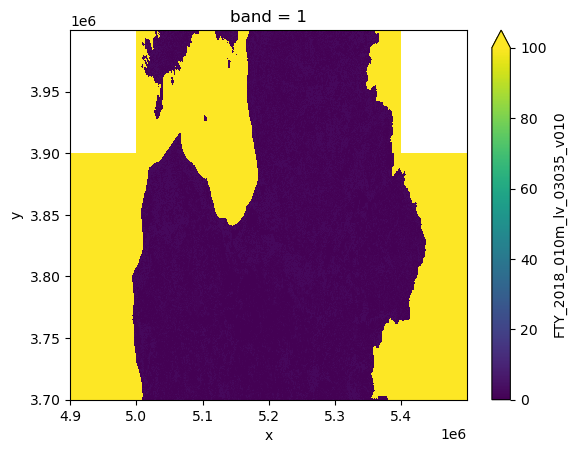

In [17]:
downsampled_cube = fty.isel(
    x=slice(None, None, 10),  
    y=slice(None, None, 10),
)
downsampled_cube.FTY_2018_010m_lv_03035_v010.plot(vmin=0, vmax=100)

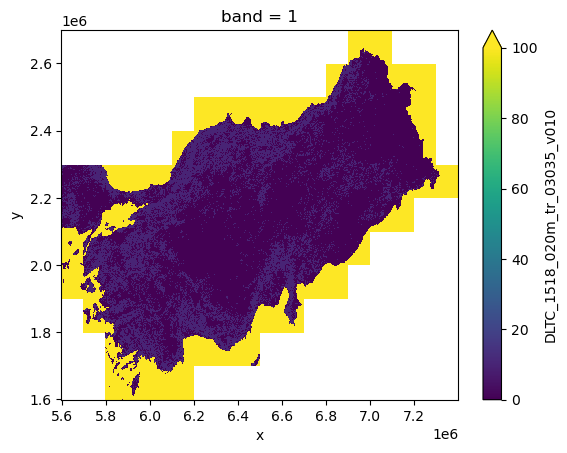

In [18]:
downsampled_cube = dlt.isel(
    x=slice(None, None, 100),  
    y=slice(None, None, 100),
)
downsampled_cube.DLTC_1518_020m_tr_03035_v010.plot(vmin=0, vmax=100)